In [ ]:
'''해야할 일
   1)분석 가정 확인하기(특히 등분산성)
   2)사후분석 방법과 다변량분산분석의 통계량에 대해 조사하기
   3)공분산분석의 사후분석 확인하기
   4)오래된 코드가 많다. stats의 코드 찾기
'''
# https://mindscale.kr/course/basic-stat-python/25/
# https://eva-codingnote.tistory.com/14
# https://syj9700.tistory.com/15
# https://m.blog.naver.com/y4769/220627663821

In [1]:
import pandas as pd
import numpy as np
purchase = pd.read_csv('data/Ashopping.csv', encoding='cp949')

## ANOVA(분산분석)
3개 이상의 범주를 갖는 명목척도 독립변수와 수치형 종속변수 사이의 관계를 집단간 평균 차이로 비교할 때 사용한다.
- 수치에 불과한 평균값 간 차이만으로 범주간 차이를 논하기 어렵다.
- 평균값 차이가 커도 범주별 분포가 많이 겹쳐 대부분의 데이터가 복수의 집단에 속한다면 범주별 유의한 차이가 존재한다 보기 힘들다.<br>
  이에 집단간 분산이 집단 내 분산보다 크다는 조건을 추가해 평균 차이를 비교한다.
- 분산분석은 `집단별 종속변수의 정규성`, `집단 간 독립성`, `집단 간 등분산`을 가정한다.
- 분산분석의 가설은 아래와 같다.<br>
  <center>$H_0: \mu_1 = \mu_2 = \dots = \mu_c, H_1:$ 집단의 평균이 모두 같진 않다. 적어도 1개의 집단은 다른 집단과 유의한 평균 차이를 갖는다.</center>
- 분산분석은 $F$ 검정통계량을 사용하며 $F$ 통계량은 $\frac{집단 간 분산}{집단 내 분산}$을 나타내 $F_{\alpha}$보다 크면 집단 간 차이가 충분히 크다 결론 짓는다.

## 사후분석
분산분석의 대립가설을 채택한 경우 어떤 집단간 차이가 유의한 지 알아내는 분석이다. <br>
※ 분산분석의 대립가설 채택이 사후분석의 가정은 아니기에 분산분석의 귀무가설이 채택되어도 수행할 수 있으며 이 경우에 모평균간 차이가 존재할 수 있다.
- 사후분석의 가설은 아래와 같다.
  <center>$H_0:$ 집단$_i$와 집단$_j$의 차이가 존재한다. $H_1:$ 집단$_i$와 집단$_j$의 차이가 존재하지 않는다.</center>
- Fisher의 최소유의차(LSD): 등분산을 가정하는 방법으로써 분산분석의 귀무가설 기각 시 사용하며 각 집단의 표본 크기가 다른 경우에도 적용할 수 있다는 장점이 있다.
- Tukey의 정직유의차(HSD): LSD 방법보다 더욱 엄격한 방법으로 집단간 차이를 가장 정밀하게 감지할 수 있으나 집단별 표본 크기가 같은 경우에 유의하며 보통 검정력이 떨어져 유의수준을 0.1 이상의 큰 값으로 분석한다.
- `Scheffe 방법`: 일반적인 사후분석 방법이나 다른 사후분석 방법보다 엄격하고 집단별 표본 크기가 다른 경우에도 사용 가능하다. 그러나 필요 이상으로 넓은 신뢰구간을 제시하는 단점이 있다.
- Duncan 방법: LSD와 같이 등분산을 가정하는 방법으로 1종 오류를 범할 가능성이 높다는 단점이 있다.
- Bonferroni: 가장 많이 사용하는 사후분석이다.
- Sidak: Bonferroni보다 보수적인 방법으로 Bonferroni 검정력을 보정하고 싶을 때 사용한다.

In [ ]:
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats

comp = MultiComparison(df.weight, df.group)

In [ ]:
# Bonferroni
# :https://mindscale.kr/course/basic-stat-python/22/
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

In [ ]:
# Turkey HSD
from statsmodels.stats.multicomp import pairwise_tukeyhsd

hsd = pairwise_tukeyhsd(df['weight'], df['group'], alpha=0.05)
hsd.summary()

In [ ]:
# Sidak

### $\blacktriangleright$ 일원분산분석(OneWay - ANOVA)
1개의 명목척도 독립변수의 집단별 1개의 수치형 종속변수 평균 차이를 검정하는 분산분석이다.
- 분산은 각 자료가 평균으로부터 흩어진 정도($\sum(X_i - \overline{X})^2$)뿐 아니라 자료의 수($\frac{1}{n}$)에도 영향을 받기 때문에 각 편차제곱합을 자유도로 나누어<br>
  표준화 값으로 검정통계량 $F$를 구한다.
  $$F = \frac{MSB}{MSW} = \frac{~~\large\frac{SSB}{c-1}~~}{~~\large\frac{SSW}{n-c}~~}$$
  • 집단 내 분산(SSW): 각 집단의 평균치를 중심으로 각 집단 내의 자료들이 흩어진 정도
    $$SSW = \sum\sum(X_{ij} - \overline{X_j})^2, ~DF = n-c$$$$(i\text{: 집단 내 데이터 번호},~ j\text{: 집단 번호},~ n\text{: 자료수},~ c\text{: 집단수})$$
  • 집단간 분산(SSB): 각 집단의 평균들이 전체 평균으로부터 흩어진 정도
    $$SSB = \sum(\overline{X_j} - \overline{X})^2, ~DF = c-1$$$$(j\text{: 집단 번호}, ~c\text{: 집단수})$$
  • 총 분산(SST): 각 자료들이 전체 평균으로부터 흩어진 정도
  $$SST = \sum\sum(X_{ij} - \overline{X})^2, ~DF = n-1$$$$(i\text{: 집단 내 데이터 번호}, ~j\text{: 집단 번호}, ~n\text{: 자료수})$$

In [2]:
# 1)정규성 & 등분산 검정
#  :유의수준 0.01 하에서 귀무가설이 기각되었다. 이에 네 집단의 분산은 동일하지 않다.
from scipy.stats import levene
purchase_mx = [purchase.query('구매유형==@i').총_매출액.values for i in range(1, 5)]
levene(purchase_mx[0], purchase_mx[1], purchase_mx[2], purchase_mx[3])

LeveneResult(statistic=61.83834278363635, pvalue=1.1483869977419955e-36)

In [3]:
# 2)일원분산분석
#  :등분산을 만족하지 않기에 Welch 일원분산분석을 시도한 결과 유의수준 0.01 하에서 귀무가설이 기각되었다.
#   즉, 네 집단의 평균이 모두 동일하진 않다.
from pingouin import welch_anova
print(welch_anova(dv='총_매출액', between='구매유형', data=purchase))

  Source  ddof1       ddof2          F         p-unc       np2
0   구매유형      3  230.935837  88.238457  4.482842e-38  0.193409


In [4]:
# 3)사후 분석
#   :어느 집단간 평균의 차이가 유의한지 확인하기 위해 사후분석을 시도한다. 이때 집단별 크기가 다르기에 scheffe 방법을 사용한다.
#    사후분석의 p-value 행렬(=사후분석표)을 통해 집단 1과 집단 4만 제외하곤 유의수준 0.01 하에서 집단 간 차이가 존재함을 알 수 있다.
# !pip install scikit_posthocs (정여진 교수님 Code 확인하기)
print('집단별 크기:', [len(i) for i in purchase_mx])

from scikit_posthocs import posthoc_scheffe
print(posthoc_scheffe(purchase, val_col='총_매출액', group_col='구매유형'))

집단별 크기: [43, 317, 144, 496]
              4             2             1             3
4  1.000000e+00  3.991771e-27  8.046353e-01  4.636896e-31
2  3.991771e-27  1.000000e+00  5.814165e-08  8.171104e-03
1  8.046353e-01  5.814165e-08  1.000000e+00  2.001393e-12
3  4.636896e-31  8.171104e-03  2.001393e-12  1.000000e+00


In [5]:
# +) 집단 별 종속변수의 평균을 확인한 결과 집단 3 > 집단 2 > 집단 4 > 집단 1 순을 가짐을 확인했다.
print(purchase.groupby('구매유형')['총_매출액'].mean().sort_values(ascending=False))

구매유형
3    1.177984e+07
2    9.612645e+06
4    4.392794e+06
1    3.403682e+06
Name: 총_매출액, dtype: float64


In [ ]:
# 예제 2) 등분산을 만족하는 경우
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# ols 사용 시 독립변수에는 C를 붙여줘야 한다.
model = ols('time ~ C(poison)', dat).fit()
anova_lm(model)

### $\blacktriangleright$ 이원분산분석(TwoWay - ANOVA)
2개의 명목척도 독립변수의 집단 조합별 1개의 수치형 종속변수 평균 차이를 검정한다. 예를 들어, 성별과 나이대별 통신요금의 차이를 비교한다.
- 독립변수가 2개로 독립변수간 상호작용 효과를 고려해줘야 한다. 독립변수 $X_1$의 모든 집단에 대해 각 집단이 독립변수 $X_2$의 모든 집단에서 동일한 수준의 종속변수 값을 갖지 않기에 발생하는 효과로 종속변수에 대한 독립변수들의 결합효과를 의미한다.<br>
  ※ 독립변수간 상호작용이 존재하지 않을 때 이원분산분석은 2개의 독립변수에 대해 각각의 일원분산분석을 수행하는 것과 동일하다.
- 이원분산분석은 각 독립변수에 대한 분산분석, 독립변수간 상호작용에 대한 가설검정으로 이루어진다.<br>
  • 독립변수간 상호작용 가설검정의 가설은 아래와 같다.
  <center>$H_0$: 두 독립변수 간 상호작용 효과는 없다. $H_1$: 두 독립변수 간 상호작용 효과가 있다.</center>
- 검정통계량 $F$는 독립변수별 집단간 분산과 오차를 각각의 자유도로 나눈 값으로 구한다.
  $$F = \frac{MSB_i}{MSE} = \frac{\large\frac{SSB_i}{C_{\small i}-1}}{\large\frac{SSE}{(C_{\small 1} - 1)(C_{\small 2} - 1)}}$$
  •  집단간 분산: 독립변수 $X_i$의 집단별 데이터 평균과 전체 평균의 차이를 뜻한다.
    $$SSB_i = \sum_{k=1}^{C_i}(\overline{X_{ki}} - \overline{X})^2, ~DF = C_i - 1$$$$(k\text{: 독립변수}X_i\text{의 범주 번호}, ~C_i\text{: 독립변수}X_i\text{ 의 범주 수})$$
  •  오차
    $$SSE = \sum\sum(\overline{X} - \overline{X_{i}} - \overline{X_{j}} - \overline{X_{ij}})^2, ~DF = (C_1-1)(C_2-1)$$
$$(X_i\text{:독립변수}X_1\text{ 내 }i\text{번째 집단의 데이터}, X_j\text{:독립변수}X_2\text{ 내 }j\text{번째 집단의 데이터}, $$
$$X_{ij}\text{:독립변수}X_1\text{ 내 }i\text{번째 집단이자 독립변수}X_2\text{ 내 }j\text{번째 집단의 데이터}, ~C_i\text{: 독립변수}X_i\text{ 의 범주 수})$$
  •  총 분산
    $$SST = \sum\sum (X_{ij} - \overline{X})^2, ~ DF = C_1C_2 - 1$$
    $$(X_{ij}\text{:독립변수}X_1\text{ 내 }i\text{번째 집단이자 독립변수}X_2\text{ 내 }j\text{번째 집단의 데이터},~ ~C_i\text{: 독립변수}X_i\text{ 의 범주 수})$$

In [5]:
# 1) 정규성 & 독립성 & 등분산 검정
#  :비균형자료로 가정이 성립되지 않는다.
display(pd.pivot_table(purchase, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.size, fill_value=0))

거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,0,1,6,11,18,6,1
2,0,0,7,32,89,118,71
3,4,6,14,31,40,32,17
4,0,9,33,112,188,125,29


In [13]:
# 2) 이원분산분석
#  :등분산을 가정하고 anova 분석을 수행한 결과 p-value에 따라 구매유형, 거주지역의 집단별 종속변수 평균이 차이가 있으며 
#   두 독립변수간 상호작용은 존재한다. 즉, 구매유형과 거주지역에 따라 총_매출액은 차이가 있으며 구매유형과 거주지역 간 상호작용이 존재한다.
from pingouin import anova
print(anova(dv='총_매출액', between=['구매유형','거주지역'], data=purchase))

        Source            SS     DF            MS          F         p-unc  \
0         구매유형  6.331277e+15    3.0  2.110426e+15  64.174574  7.112960e-38   
1         거주지역  1.614031e+16    6.0  2.690052e+15  81.800060  6.216329e-83   
2  구매유형 * 거주지역  3.867936e+15   18.0  2.148853e+14   6.534310  1.360710e-15   
3     Residual  3.209644e+16  976.0  3.288570e+13        NaN           NaN   

        np2  
0  0.164758  
1  0.334606  
2  0.107549  
3       NaN  


In [6]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model = ols('time ~ C(poison) * C(treat)', dat).fit()
anova_lm(model, typ=2) # 비균형자료시 anova_lm(model, typ=3)

In [16]:
# 3) 사후분석
#  :집단별 데이터수가 달라 scheffe 방법을 사용한다.
#   사후분석표에 따라 독립변수 '구매유형' 내 집단 1, 4를 제외하곤 유의수준 0.01 하에서 유의한 차이를 가지며
#   독립변수 '거주지역' 내에선 집단 2와 7, 집단 3와 6, 집단 3과 7, 집단 4와 6, 집단 4와 7, 집단 5와 6, 집단 5와 7, 집단 6과 7 사이에 
#   유의수준 0.05 하에서 유의한 차이가 존재한다.
print('-------------------집단별 데이터수-------------------')
display(pd.pivot_table(purchase, index='구매유형',columns='거주지역', values='총_매출액', aggfunc=np.size))

from scikit_posthocs import posthoc_scheffe
print('-------------------구매유형 사후분석-------------------')
display(posthoc_scheffe(purchase, val_col='총_매출액', group_col='구매유형', sort=True))
print('-------------------거주지역 사후분석-------------------')
display(posthoc_scheffe(purchase, val_col='총_매출액', group_col='거주지역', sort=True))

-------------------집단별 데이터수-------------------


거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,1.0,6.0,11.0,18.0,6.0,1.0
2,NaN,NaN,7.0,32.0,89.0,118.0,71.0
3,4.0,6.0,14.0,31.0,40.0,32.0,17.0
4,NaN,9.0,33.0,112.0,188.0,125.0,29.0


-------------------구매유형 사후분석-------------------


,1,2,3,4
1,1.000000e+00,5.814165e-08,2.001393e-12,8.046353e-01
2,5.814165e-08,1.000000e+00,8.171104e-03,3.991771e-27
3,2.001393e-12,8.171104e-03,1.000000e+00,4.636896e-31
4,8.046353e-01,3.991771e-27,4.636896e-31,1.000000e+00


-------------------거주지역 사후분석-------------------


,1,2,3,4,5,6,7
1,1.000000,0.999971,9.999998e-01,9.999994e-01,9.999969e-01,9.884085e-01,4.121152e-01
2,0.999971,1.000000,9.999095e-01,9.804673e-01,9.648727e-01,3.386782e-01,6.004443e-05
3,1.000000,0.999910,1.000000e+00,9.777644e-01,9.345494e-01,1.856544e-02,1.006585e-12
4,0.999999,0.980467,9.777644e-01,1.000000e+00,9.999822e-01,8.034945e-03,4.117706e-18
5,0.999997,0.964873,9.345494e-01,9.999822e-01,1.000000e+00,2.345766e-03,6.388251e-21
6,0.988408,0.338678,1.856544e-02,8.034945e-03,2.345766e-03,1.000000e+00,9.036356e-09
7,0.412115,0.000060,1.006585e-12,4.117706e-18,6.388251e-21,9.036356e-09,1.000000e+00


In [21]:
# +) 집단별 종속변수의 평균을 확인해본다.
#   :이원분산분석 결과에서 밝힌 것처럼 특정 구매유형과 특정 거주지역의 경우 다른 영역과 매우 다른 매출액 차이를 보이고 있다.
#    구매유형 3과 거주지역 7이 그에 해당하며 특별한 마케팅 방법이 요구된다.
display(pd.pivot_table(purchase, index='구매유형',columns='거주지역', values='총_매출액', aggfunc=np.mean))

거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,3.281350e+06,3.002825e+06,3.041428e+06,3.637032e+06,3.712147e+06,3.864880e+06
2,NaN,NaN,4.215649e+06,8.278687e+06,6.590331e+06,1.022677e+07,1.351384e+07
3,4906400.0,3.215055e+06,6.809777e+06,7.965440e+06,1.104608e+07,1.376868e+07,2.545144e+07
4,NaN,4.034176e+06,3.720990e+06,4.229915e+06,4.272964e+06,4.749139e+06,5.138468e+06


### $\blacktriangleright$ 다변량분산분석(MANOVA)
1개 이상의 독립변수와 2개 이상의 종속변수에 대해 독립변수 집단간 종속변수 평균 차이를 평가하는 방법이다.
- 다변량분산분석은 여러 변수를 고려할 수 있음에 집단간 평균 비교 뿐만 아니라 모집단에 대해 여러 상황을 제시하고 여러 개의 변수를 동시에 관찰하는 경우에도 유용하다.
- 종속변수를 벡터변수로 보고 다차원 공간에서 평균이 같은지 조사한다. 즉, 벡터간 거리를 검증한다.
- 종속변수가 2개로 종속변수 사이 상관관계가 존재하는 지 반드시 파악해야 하며 종속변수간 상관관계가 없다면 단변량분산분석으로 각각 분석을 진행해도 무방하다.
- 대표적인 다변량분산분석의 검정통계량은 아래와 같다.<br>
  • Pillai's Trace: 집단간 분산/총 분산으로 값이 클수록 유의하다.<br>
  • `Wilk's Lambda`: 집단 내 분산/총 분산으로 값이 작을수록 유의하다.<br>
  • Hotteling's $T^2$(Lawley-Hotelling): 집단간 분산/집단 내 분산으로 값이 클수록 유의하다.<br>
  • Roy의 최대근

In [22]:
# 1) 종속변수간 상관분석 
#  :두 변수 모두 수치형 변수로 pearson 상관분석을 한 결과 p-value에 따라 유의수준 0.01 하에서 상관관계가 존재한다.
from scipy.stats import pearsonr
print(pearsonr(purchase.총_매출액, purchase.방문빈도))

(0.6311706453193395, 3.051960449687332e-112)


In [ ]:
# 2) 변수들의 다변량정규분포성, 등분산성 여부 등 검정

In [2]:
# 3) 다변량분산분석
# :MANOVA 함수로 다변량분산분석을 수행하며 종속변수1+종속변수2+... ~ 독립변수1+독립변수2+...로 모형을 선언한다.
#  분석 결과로 전체 모형의 적합성, 독립변수에 대한 다변량분산분석 모형의 결과가 출력된다.
#  다변량분산분석의 통계치와 p-value를 확인해보면 모두 유의수준 0.01 하에서 유의하다.
from statsmodels.multivariate.manova import MANOVA
print(MANOVA.from_formula('방문빈도+총_매출액 ~ 구매유형+거주지역', data=purchase).mv_test())

                  Multivariate linear model
                                                              
--------------------------------------------------------------
        Intercept        Value  Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda 0.9578 2.0000 996.0000 21.9327 0.0000
          Pillai's trace 0.0422 2.0000 996.0000 21.9327 0.0000
  Hotelling-Lawley trace 0.0440 2.0000 996.0000 21.9327 0.0000
     Roy's greatest root 0.0440 2.0000 996.0000 21.9327 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          구매유형          Value  Num DF  Den DF  F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.8248 2.0000 996.0000 105.8119 0.0000
         Pillai's trace 0.1752 2.0000 996.0000 105.8119 0.0000
 Hotelling-

In [4]:
# 4) 사후분석
# :독립변수와 종속변수를 조합해보며 사후분석을 수행하며 집단 내 데이터수가 다르기에 scheffe 방법을 사용한다.
#  총_매출액에 대한 결과는 이원분산분석의 결과와 동일하며
#  방문빈도는 구매유형의 집단 1과 2, 1과 4, 2와 3, 2와 4에서 차이가 유의수준 0.05 하에서 유의하며
#  거주지역의 집단 1과 7, 2와 6, 2와 7, 3과 5, 3와 6, 3과 7, 4와 6, 4와 7, 5와 6, 5와 7, 6과 7 간 차이도 유의수준 0.05 하에서 유의하다.
from scikit_posthocs import posthoc_scheffe
display(posthoc_scheffe(purchase, val_col='총_매출액', group_col='구매유형', sort=True))
display(posthoc_scheffe(purchase, val_col='총_매출액', group_col='거주지역', sort=True))
display(posthoc_scheffe(purchase, val_col='방문빈도', group_col='구매유형', sort=True))
display(posthoc_scheffe(purchase, val_col='방문빈도', group_col='거주지역', sort=True))

,1,2,3,4
1,1.000000e+00,5.814165e-08,2.001393e-12,8.046353e-01
2,5.814165e-08,1.000000e+00,8.171104e-03,3.991771e-27
3,2.001393e-12,8.171104e-03,1.000000e+00,4.636896e-31
4,8.046353e-01,3.991771e-27,4.636896e-31,1.000000e+00


,1,2,3,4,5,6,7
1,1.000000,0.999971,9.999998e-01,9.999994e-01,9.999969e-01,9.884085e-01,4.121152e-01
2,0.999971,1.000000,9.999095e-01,9.804673e-01,9.648727e-01,3.386782e-01,6.004443e-05
3,1.000000,0.999910,1.000000e+00,9.777644e-01,9.345494e-01,1.856544e-02,1.006585e-12
4,0.999999,0.980467,9.777644e-01,1.000000e+00,9.999822e-01,8.034945e-03,4.117706e-18
5,0.999997,0.964873,9.345494e-01,9.999822e-01,1.000000e+00,2.345766e-03,6.388251e-21
6,0.988408,0.338678,1.856544e-02,8.034945e-03,2.345766e-03,1.000000e+00,9.036356e-09
7,0.412115,0.000060,1.006585e-12,4.117706e-18,6.388251e-21,9.036356e-09,1.000000e+00


,1,2,3,4
1,1.000000e+00,2.142682e-39,7.465572e-02,2.979605e-02
2,2.142682e-39,1.000000e+00,1.313132e-62,2.177384e-107
3,7.465572e-02,1.313132e-62,1.000000e+00,9.978053e-01
4,2.979605e-02,2.177384e-107,9.978053e-01,1.000000e+00


,1,2,3,4,5,6,7
1,1.000000,9.999995e-01,9.996095e-01,9.488212e-01,8.784110e-01,4.513984e-01,1.839820e-02
2,1.000000,1.000000e+00,9.988872e-01,6.037499e-01,3.034601e-01,4.759501e-03,5.740487e-09
3,0.999610,9.988872e-01,1.000000e+00,3.704638e-01,4.033948e-02,1.369940e-07,9.928584e-22
4,0.948821,6.037499e-01,3.704638e-01,1.000000e+00,9.131234e-01,5.433837e-06,5.014399e-24
5,0.878411,3.034601e-01,4.033948e-02,9.131234e-01,1.000000e+00,1.098415e-04,1.266043e-23
6,0.451398,4.759501e-03,1.369940e-07,5.433837e-06,1.098415e-04,1.000000e+00,5.284495e-09
7,0.018398,5.740487e-09,9.928584e-22,5.014399e-24,1.266043e-23,5.284495e-09,1.000000e+00


In [24]:
# +) 종속변수별 집단 평균을 확인한다.
#  :다변량분산분석 결과처럼 구매유형 2와 거주지역 7의 방문빈도는 다른 영역과 확연히 차이 난다.
display(pd.pivot_table(purchase, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean))
display(pd.pivot_table(purchase, index='구매유형', columns='거주지역', values='방문빈도', aggfunc=np.mean))

거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,3.281350e+06,3.002825e+06,3.041428e+06,3.637032e+06,3.712147e+06,3.864880e+06
2,NaN,NaN,4.215649e+06,8.278687e+06,6.590331e+06,1.022677e+07,1.351384e+07
3,4906400.0,3.215055e+06,6.809777e+06,7.965440e+06,1.104608e+07,1.376868e+07,2.545144e+07
4,NaN,4.034176e+06,3.720990e+06,4.229915e+06,4.272964e+06,4.749139e+06,5.138468e+06


거주지역,1,2,3,4,5,6,7
구매유형,,,,,,,
1,NaN,8.000000,8.666667,10.818182,10.222222,9.666667,10.000000
2,NaN,NaN,29.142857,42.312500,39.022472,48.211864,58.845070
3,7.75,5.000000,7.928571,11.903226,15.350000,20.437500,40.764706
4,NaN,12.777778,12.484848,17.276786,18.000000,18.768000,19.965517


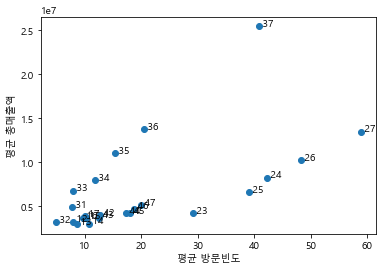

In [83]:
# +) 시각화로 표현하기
#  :시각화를 통해 구매유형 2와 거주지역 7이 방문빈도가 매우 높고 
#   구매유형 3과 거주지역 7이 총 매출액이 매우 높음을 두드러지게 확인할 수 있다.
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

X = pd.pivot_table(purchase, index='구매유형', columns='거주지역', values='방문빈도', aggfunc=np.mean)
Y = pd.pivot_table(purchase, index='구매유형', columns='거주지역', values='총_매출액', aggfunc=np.mean)

for x in range(purchase.구매유형.nunique()):
    for y in range(purchase.거주지역.nunique()):
        plt.annotate(text=f' {x+1}{y+1}', xy=(X.iloc[x, y], Y.iloc[x, y]))
        
plt.plot(X.values.flatten(), Y.values.flatten(), 'o')
plt.xlabel("평균 방문빈도")
plt.ylabel("평균 총매출액")
plt.show()

### $\blacktriangleright$ 공분산분석(ANCOVA)
독립변수로 범주형 변수와 수치형 변수가 모두 존재하는 경우 공변량(=수치형 변수)를 통제해 순수하게 집단 간 종속변수의 평균 차이를 분석한다.
- 공분산분석 모형은 아래와 같다.
  $$Y_{ij} = \mu + \alpha_i + \beta X_{ij} + \epsilon_{ij}$$
  $$(\mu\text{: 전체 데이터 평균},~ \alpha_i\text{: 처리효과},~ \beta X_{ij}\text{:공변량 효과},~ \epsilon_{ij}\text{: 잔차})$$
  • 종속변수에 영향을 미치는 변수로 명목척도만 존재하는 것은 필히 아닐 것이며 수치형 독립변수가 존재할 것이다. 분산분석의 측면에서 <br>$~~$기존 분산분석 모형을 보완해 공분산분석 모형으로 명목척도와 수치형 독립변수를 모두 고려해 종속변수를 더 잘 설명한 뒤 공변량의 효과 분석,<br>$~$ 공변량 효과 제거로 순수한 명목척도 독립변수의 효과를 분석하는 방법이다.<br>
  • 종속변수에 영향을 미치는 변수로 명목척도도 가능하다. 회귀분석 측면에서 공분산분석은 수치형 독립변수만이 아닌 범주형 변수를 반영해 종속변수를<br>$~$ 표현한 것으로 범주별 서로 다른 회귀모형을 적합시켜야 하는지와 범주별 회귀분석 수행을 가능하게 한다.<br>
  • 각각 범주형 변수만 고려한 분산분석, 수치형 변수만 고려한 회귀분석의 단점을 보완한다.
- 공분산분석은 공변량을 통제하고 남은 독립변수의 개수에 따라 일원공분산분석, 다원공분산분석, 다변량 공분산분석으로 구분한다.
- 공분산분석의 가설은 아래와 같다.
  <center>$H_0:$ 공변량 통제 하에 명목척도에 따른 종속변수의 차이는 없다. $H_1:$ 공변량 통제 하에 명목척도에 따른 종속변수의 차이는 있다.$\qquad\quad$</center>
  ※ 공변량을 통제함이란 집단별 공변량 값이 차이없게 고정시킨 뒤 집단별 종속변수의 조정평균을 구하여 집단간 차이를 논한다는 의미이다.

In [ ]:
# 공분산분석식에서  𝛼𝑖가 없다면 일반적인 회귀분석 모형과 동일해지고  𝛽𝑋𝑖𝑗가 없다면 일반적인 분산분석 모형과 동일해진다.

In [ ]:
# 1) 정규성 & 독립성 & 등분산성 검정

In [85]:
# 2) 일원공분산분석
#  :공변량을 통제했을 때 F-value는 4.045779, p-value가 5.155222e-04로 유의수준 0.01하에서 대립가설을 채택한다.
from pingouin import ancova
print(ancova(dv='총_매출액', between='거주지역', covar='방문빈도', data=purchase)) # covar parameter로 공변량을 지정한다.

     Source            SS   DF           F         p-unc       np2
0      거주지역  6.966968e+14    6    4.045779  5.155222e-04  0.023886
1      방문빈도  1.370144e+16    1  477.392823  1.037974e-86  0.324891
2  Residual  2.847096e+16  992         NaN           NaN       NaN


In [86]:
# +) 일원분산분석
#  :공변량을 통제하지 않은 분산분석의 결과로 p-value에 따라 유의수준 0.01하에서 대립가설을 채택한다.
#   공분산분석 결과와 비교하여 방문빈도 또한 종속변수에 영향을 미치고 있으며 공변량을 통제하지 않을 경우 F값(24.759)이 훨씬 커 
#   방문빈도를 통제하지 않은 채 거주지역에 따른 매출액 차이를 비교할 때 과대평가되는 문제가 발생할 수 있다.
#   적절한 매출액 차이를 구하기 위해선 방문빈도는 통제되어야 한다.
from pingouin import anova
print(anova(dv='총_매출액', between='거주지역', data=purchase))

  Source  ddof1  ddof2          F         p-unc       np2
0   거주지역      6    993  24.759482  1.869176e-27  0.130135


In [ ]:
# 3) 사후분석(Bonferroni)